
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives


At the end of the experiment, you will be able to:

* understand and implement the SVM algorithm to classify the given dataset
* understand and apply the Kernels

We will be performing following actions in this experiment :


    1. Kernel for non-linearity classification:
      a. Generating data and visualize the data points
      b. Fit the model using linear kernel and visualize the decision boundaries of the data
      c. Fit the model using the RBF kernel and visualize the decision boundaries
      d. Fit the model with different parameters of 'C' and visualize the decision boundaries of the data


In [ ]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="720" height="540" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/misc/svm_kernels.mp4" type="video/mp4">
</video>
""")

## Dataset



###Description


In this experiment, we will use the make_circles() function generates a binary classification problem with datasets that fall into concentric circles. This function is suitable for algorithms that can learn complex non-linear manifolds



The make_blobs dataset from sklearn generates points that follow Gaussian distribution and they are mainly used for linear classification problems.







## AI / ML Technique



###SVM



In this experiment, we are using SVM. 

**Below is a quick overview of SVM.**

* SVM assumes that the data is linearly separable.

* It chooses the line which is more distant from both the classes.

In the SVM algorithm, we find the points closest to the line from both the classes. These points are called support vectors. We compute the distance between the line and the support vectors which is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is called an optimal hyperplane.

![alttxt](https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Images/SVM.png)




## Kernels



##Kernel

In this experiment, we are using Kernels. 

The kernel means transforming data into another dimension that has a clear dividing margin between classes of data as shown in the below image.

![alttxt](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/kernel.png)




### Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [4]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W9_12_SVMandKernels_A" #name of the notebook

def setup():
    ipython.magic("sx pip install seaborn")
    ipython.magic("sx pip install sklearn")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

### Generating the dataset 

Load the data from the SKlearn datasets

In [6]:
from sklearn.datasets import make_circles

# The number of points generated is 100 
# The scale factor between inner and outer circle is 0.1. Inner circle is one class and outer circle is another class.
# The Standard deviation of Gaussian noise added to the data is 0.1

X, y = make_circles(100, factor=0.1, noise=.1)  # YOUR CODE HERE : Generate data using 'make_circles' function from SkLearn (for easy start refer to the examples in sklearn doucmentation)

To get a sense of the data, let us visualize the data

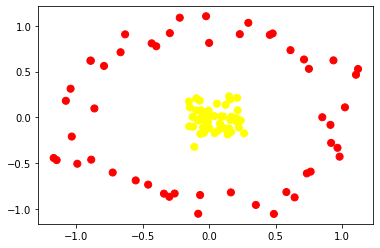

In [7]:
# YOUR CODE HERE : Scatter Plot 'X' (Column 1 vs Column 2) where 'y' points defines the colors
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Kernels

### Apply the SVM classifier and try to fit the model using Linear Kernel on the data

In [8]:
clf =SVC(kernel='linear').fit(X, y)  # YOUR CODE HERE : Explore and Create a 'SVMClassifer' with Linear kernel from SkLearn (for easy start, check the examples in sklearn documentation)
       # YOUR CODE HERE: Fit the data ('X' and 'y') in the model

Let us visualize the decision boundaries of the data

In [9]:
# Function for plotting Decision boundaries

def plot_svc_decision_boundaries(model, ax=None, plot_support=True):
    
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    print(xlim)
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.reshape(-1), Y.reshape(-1)]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Call the above function by passing the trained model to observe the decision boundaries

(-1.282687649687512, 1.234389412162997)


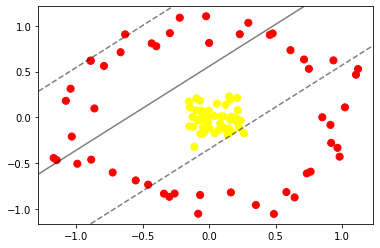

In [10]:
# YOUR CODE HERE : Scatter Plot 'X' (Column 1 vs Column 2) where 'y' points defines the colors
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# YOUR CODE HERE : Plot decision boundries using 'plot_decision_boundaries' function defined above
plot_svc_decision_boundaries(clf);

From the above plot, observe that the data points are not linearly seperable by using linear SVM model.

One strategy for separting the classess is to compute a **basis function** centered at every point in the dataset. This type of basis function transformation is known as a kernel transformation, as it is based on a similarity relationship (or kernel) between each pair of points.

A potential problem with this strategy—projecting N points into N dimensions—is that it might become very computationally intensive as N grows large. However, because of a neat little procedure known as the kernel trick, a fit on kernel-transformed data can be done implicitly—that is, without ever building the full N-dimensional representation of the kernel projection! 

### Try to apply SVM Classifier using RBF Kernel

In Scikit-Learn, apply kernelized SVM simply by changing linear kernel to an RBF (radial basis function) kernel

In [11]:
clf = SVC(kernel='rbf').fit(X, y) # YOUR CODE HERE : Explore and Create a 'SVMClassifer' with rbf kernel from SkLearn (for easy start, check the examples in sklearn documentation)
       # YOUR CODE HERE: Fit the data ('X' and 'y') in the model

Visualization using RBF Kernel

(-1.282687649687512, 1.234389412162997)


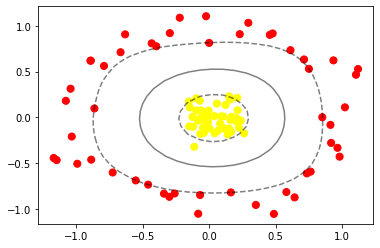

In [12]:
# YOUR CODE HERE : Scatter Plot 'X' (Column 1 vs Column 2) where 'y' points defines the colors
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# YOUR CODE HERE : Plot decision boundries using 'plot_decision_boundaries' function defined above
plot_svc_decision_boundaries(clf)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

So far we have centered around very clean datasets, in which a perfect decision boundary exists. But what if your data has some amount of overlap? For example, you may have data like below:

In [13]:
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples = 100, centers = 2,
                  random_state = 0, cluster_std = 1.2) # YOUR CODE HERE : Generate data using 'make_blobs' function from SkLearn (for easy start refer to the examples in sklearn doucmentation)

To get a sense of the data, let us visualize the data

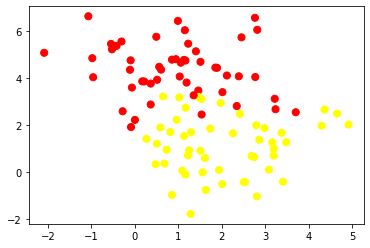

In [14]:
# YOUR CODE HERE : Scatter Plot 'X1' (Column 1 vs Column 2) where 'y1' points defines the colors
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn');

## Tuning the SVM parameter (C)

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as C. For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points.

Let us visualize the picture of how a changing C parameter affects the final fit, via the softening of the margin:


(-2.4374356480405996, 5.265159198855809)
(-2.4374356480405996, 5.265159198855809)


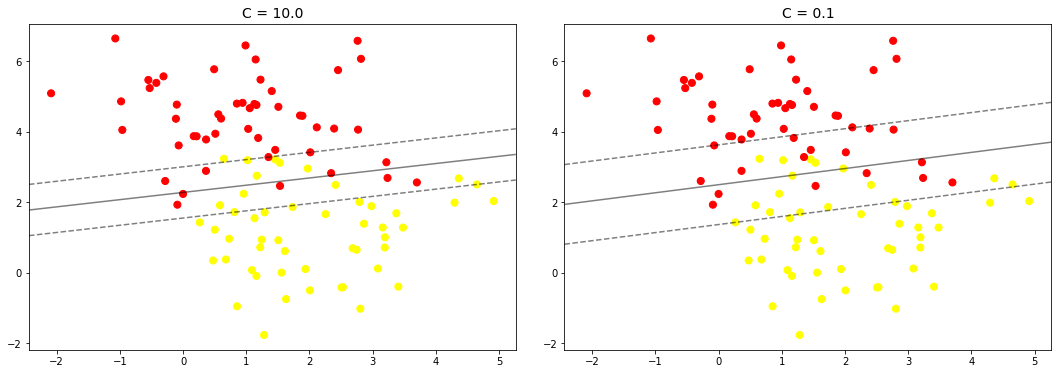

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X1, y1)# YOUR CODE HERE : Explore and Create a 'SVMClassifer' with 'linear' kernel from SkLearn (for easy start, check the examples in documentation)
    # YOUR CODE HERE: Fit the data ('X1' and 'y1') in the model
    axi.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn')
    plot_svc_decision_boundaries(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Summary

<ol>
<li> Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.</li>
<li>Once the model is trained, the prediction phase is very fast.</li>
<li>Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.</li>
<li>Their integration with kernel methods makes them very versatile, able to adapt to many types of data.</li>
</ol>

     

However, SVMs have several disadvantages as well:


<ol>
<li> The scaling with the number of samples N is [N3] at worst, or [N2] for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.</li>
<li> The results are strongly dependent on a suitable choice for the softening parameter C. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.</li>
<li> The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation</li>
</ol>

#### Acknowledgment :  Python Data Science Handbook by Jake VanderPlas

### Please answer the questions below to complete the experiment:




In [17]:
#@title State True or False: The Kernel trick is used to classify linear data { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE","FALSE"]


In [18]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [19]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "non" #@param {type:"string"}


In [20]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [21]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [22]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [23]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [24]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8919
Date of submission:  04 Nov 2020
Time of submission:  00:50:47
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
